# Regression model selection

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, max_error, mean_absolute_error, mean_squared_error

## Importing the dataset

In [2]:
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values #get all columns but the last
y = dataset.iloc[:, -1].values  #get the last column

In [3]:
print(dataset)

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]


## Splitting the dataset into the Training set and Test set

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Plotting the data

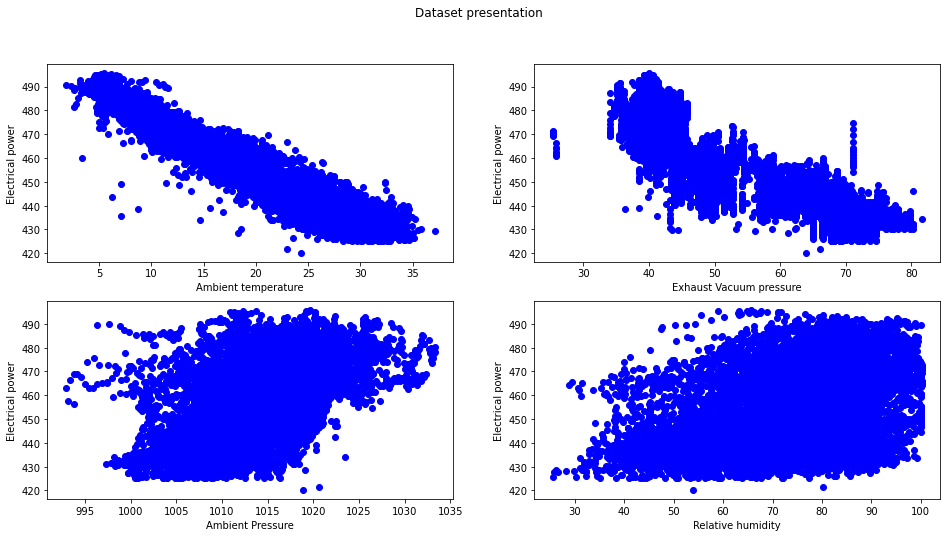

In [5]:
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2,2,figsize=(16,8))
fig.suptitle('Dataset presentation')

ax1.scatter(dataset.iloc[:, 0].values, y, color = 'blue')
ax1.set_xlabel('Ambient temperature')
ax1.set_ylabel('Electrical power')

ax2.scatter(dataset.iloc[:, 1].values, y, color = 'blue')
ax2.set_xlabel('Exhaust Vacuum pressure')
ax2.set_ylabel('Electrical power')

ax3.scatter(dataset.iloc[:, 2].values, y, color = 'blue')
ax3.set_xlabel('Ambient Pressure')
ax3.set_ylabel('Electrical power')

ax4.scatter(dataset.iloc[:, 3].values, y, color = 'blue')
ax4.set_xlabel('Relative humidity')
ax4.set_ylabel('Electrical power')

plt.show()

## Training the Multiple Linear Regression model on the Training set

In [6]:
regressor_linear_regression = LinearRegression()
regressor_linear_regression.fit(X_train, y_train)

y_pred_linear_regression = regressor_linear_regression.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_linear_regression.reshape(len(y_pred_linear_regression),1), y_test.reshape(len(y_test),1)),1))

[[431.43 431.23]
 [458.56 460.01]
 [462.75 461.14]
 ...
 [469.52 473.26]
 [442.42 438.  ]
 [461.88 463.28]]


## Training the Polynomial Regression model on the Training set

In [7]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor_polynomial_regression = LinearRegression()
regressor_polynomial_regression.fit(X_poly, y_train)

y_pred_polynomial_regression = regressor_polynomial_regression.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_polynomial_regression.reshape(len(y_pred_polynomial_regression),1), y_test.reshape(len(y_test),1)),1))

[[433.94 431.23]
 [457.9  460.01]
 [460.52 461.14]
 ...
 [469.53 473.26]
 [438.27 438.  ]
 [461.67 463.28]]


## Training the SVR model on the Training set

In [8]:
sc_X = StandardScaler()
sc_y = StandardScaler()
y_train_reshaped = y_train.reshape(len(y_train),1)
X_train_scaled = sc_X.fit_transform(X_train)
y_train_scaled = sc_y.fit_transform(y_train_reshaped)

regressor_svr = SVR(kernel = 'rbf')
regressor_svr.fit(X_train_scaled, y_train_scaled)

y_pred_svr = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_test)))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_svr.reshape(len(y_pred_svr),1), y_test.reshape(len(y_test),1)),1))

C:\Users\Max\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[434.05 431.23]
 [457.94 460.01]
 [461.03 461.14]
 ...
 [470.6  473.26]
 [439.42 438.  ]
 [460.92 463.28]]


## Training the Decision Tree Regression model on the Training set

In [9]:
regressor_decision_tree = DecisionTreeRegressor(random_state = 0)
regressor_decision_tree.fit(X_train, y_train)

y_pred_decision_tree = regressor_decision_tree.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_decision_tree.reshape(len(y_pred_decision_tree),1), y_test.reshape(len(y_test),1)),1))

[[431.28 431.23]
 [459.59 460.01]
 [460.06 461.14]
 ...
 [471.46 473.26]
 [437.76 438.  ]
 [462.74 463.28]]


## Training the Random Forest Regression model on the whole dataset

In [10]:
regressor_random_forest = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_random_forest.fit(X_train, y_train)

y_pred_random_forest = regressor_random_forest.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_random_forest.reshape(len(y_pred_random_forest),1), y_test.reshape(len(y_test),1)),1))

[[434.05 431.23]
 [458.79 460.01]
 [463.02 461.14]
 ...
 [469.48 473.26]
 [439.57 438.  ]
 [460.38 463.28]]


## Evaluating the Model Performance

In [11]:
data = [['Multiple linear regression', r2_score(y_test, y_pred_linear_regression), max_error(y_test, y_pred_linear_regression), mean_absolute_error(y_test, y_pred_linear_regression), mean_squared_error(y_test, y_pred_linear_regression)],
['Polynomial regression', r2_score(y_test, y_pred_polynomial_regression), max_error(y_test, y_pred_polynomial_regression), mean_absolute_error(y_test, y_pred_polynomial_regression), mean_squared_error(y_test, y_pred_polynomial_regression)],
['Support vector regression', r2_score(y_test, y_pred_svr), max_error(y_test, y_pred_svr), mean_absolute_error(y_test, y_pred_svr), mean_squared_error(y_test, y_pred_svr)],
['Decision tree', r2_score(y_test, y_pred_decision_tree), max_error(y_test, y_pred_decision_tree), mean_absolute_error(y_test, y_pred_decision_tree), mean_squared_error(y_test, y_pred_decision_tree)],
['Random forest regression', r2_score(y_test, y_pred_random_forest), max_error(y_test, y_pred_random_forest), mean_absolute_error(y_test, y_pred_random_forest), mean_squared_error(y_test, y_pred_random_forest)]] 
headers_1=["1", "2", "3", "4", "5"] 
headers_2=["Algorithm", "R² score", "Max error", "Mean absolute error", "Mean squared error"] 
print(pandas.DataFrame(data, headers_1, headers_2))

                    Algorithm  R² score  Max error  Mean absolute error  \
1  Multiple linear regression  0.932532  31.015131             3.566565   
2       Polynomial regression  0.945819  30.907132             3.136027   
3   Support vector regression  0.948078  30.895777             2.995178   
4               Decision tree  0.922906  50.150000             3.103924   
5    Random forest regression  0.961591  30.699000             2.452367   

   Mean squared error  
1           19.733699  
2           15.847186  
3           15.186435  
4           22.549094  
5           11.234214  
